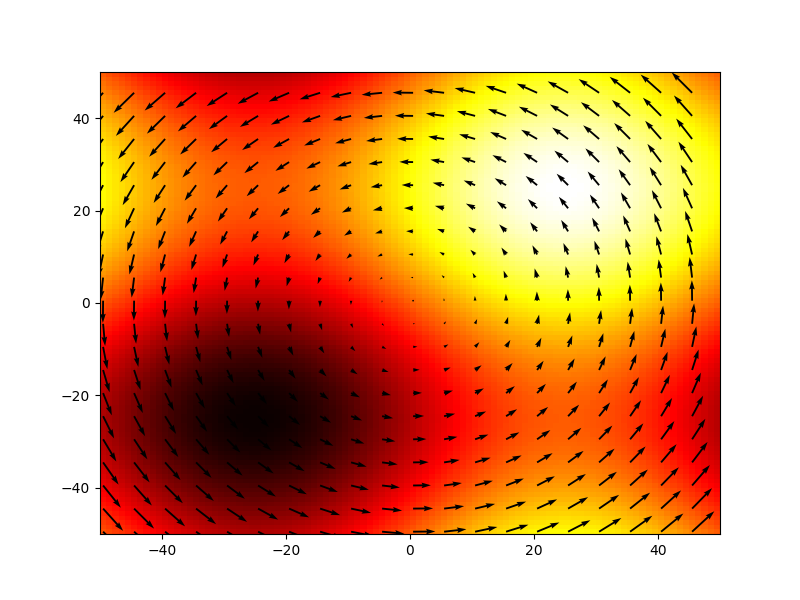

In [1]:
import numpy as np
from matplotlib import pyplot as plt

x = np.linspace(-50,50,101)
y = np.linspace(-50,50,101)
z = np.linspace(-50,50,101)
X, Y, Z = np.meshgrid(0.5*(x[:-1]+x[1:]),0.5*(y[:-1]+y[1:]),0.5*(z[:-1]+z[1:]),indexing='ij')
X1, Y1, Z1 = np.meshgrid(x,y,z)
v0=100.
vx, vy, vz = -v0*Z,  0*Y, v0*X 
ro = np.zeros((100,100,100))
ro = 2500 + 500*(np.sin(np.pi*X/50)+np.sin(np.pi*Z/50))
ig, ax1 = plt.subplots(figsize=(8, 6))
plt.pcolormesh(X[:,0,:],Z[:,0,:],ro[:,0,:],cmap=plt.hot())
plt.quiver(X[::5,0,::5], Z[::5,0,::5], vx[::5,0,::5], vz[::5,0,::5]) 
plt.show()

In [2]:


# initialisation
alpha0 = np.ones(3)
mat = np.ones(3)
dx = 1
dy = 1
dz = 1
nmat = 2

Is_overlap = 0
Ie_overlap = 100
Js_overlap = 0
Je_overlap = 100
Ks_overlap = 0
Ke_overlap = 100

# number of cells in each direction
ncorex = Ie_overlap - Is_overlap
ncorey = Je_overlap - Js_overlap
ncorez = Ke_overlap - Ks_overlap

# number of nodes in each direction
ncorexp = ncorex + 1
ncoreyp = ncorey + 1
ncorezp = ncorez + 1

# for nodes
Cp = np.zeros((3, ncorexp, ncoreyp, ncorezp))
Vp = np.zeros((3, ncorexp, ncoreyp, ncorezp))
Vp_ran = np.zeros((3, ncorexp, ncoreyp, ncorezp))

C = np.zeros((3, ncorexp, ncoreyp, ncorezp))
V_ran = np.random.randint(0, 100, size=(3, ncorexp, ncoreyp, ncorezp))
V = np.zeros((3, ncorexp, ncoreyp, ncorezp))

# for cells
volp = np.zeros((ncorex, ncorey, ncorez))
mcp = np.zeros((ncorex, ncorey, ncorez))
cmcp = np.zeros((nmat, ncorex, ncorey, ncorez))
initcoordp = np.zeros((3, ncorex, ncorey, ncorez))
rop = np.zeros((nmat, ncorex, ncorey, ncorez))
rop_ran = np.zeros((nmat, ncorex, ncorey, ncorez))
siep = np.zeros((nmat, ncorex, ncorey, ncorez))
alphap = np.zeros((nmat, ncorex, ncorey, ncorez))
volstrainp = np.zeros((ncorex, ncorey, ncorez))
voidconcp = np.zeros((ncorex, ncorey, ncorez))
damagep = np.zeros((ncorex, ncorey, ncorez))

x = np.linspace(-50,50,101)
y = np.linspace(-50,50,101)
z = np.linspace(-50,50,101)
Xc, Yc, Zc = np.meshgrid(0.5*(x[:-1]+x[1:]),0.5*(y[:-1]+y[1:]),0.5*(z[:-1]+z[1:]),indexing='ij')
v0=100.

ro = np.zeros((nmat, ncorex, ncorey, ncorez))
ro_ran = np.random.randint(0, 100, size=(nmat, ncorex, ncorey, ncorez))
for i in range(nmat):
     ro[i,:,:,:] = 2500 + 500*(np.sin(np.pi*Xc/50)+np.sin(np.pi*Zc/50))
    
Xn, Yn, Zn = np.meshgrid(x,y,z,indexing='ij')
vxp, vyp, vzp = -v0*Zn,  0*Yn, v0*Xn
# #ro = 2500 + 500*(np.sin(np.pi*X/50)+np.sin(np.pi*Z/50))
vol = np.ones((ncorex, ncorey, ncorez))
mc = np.zeros((100,100,100))
cmc = np.zeros((nmat, ncorex, ncorey, ncorez))
cmc[:,:,:,:] = 1/nmat
initcoord = np.random.randint(0, 100, size=(3, ncorex, ncorey, ncorez))
sie = np.random.randint(0, 100, size=(nmat, ncorex, ncorey, ncorez))
alpha = np.random.randint(0, 100, size=(nmat, ncorex, ncorey, ncorez))
volstrain = np.random.randint(0, 100, size=(ncorex, ncorey, ncorez))
voidconc = np.random.randint(0, 100, size=(ncorex, ncorey, ncorez))
damage = np.random.randint(0, 100, size=(ncorex, ncorey, ncorez))

for k in range(ncorezp):
    for j in range(ncoreyp):
        for i in range(ncorexp):
            C[:,i,j,k] = np.array([x[i],y[j],z[k]])
            V[:,i,j,k] = np.array([vxp[i,j,k],vyp[i,j,k],vzp[i,j,k]])

volu = np.zeros((nmat,ncorex,ncorey,ncorez))
mcu = np.zeros((nmat,ncorex,ncorey,ncorez))
for m in range(nmat):
    volu[m,:,:,:] = vol[:,:,:]*cmc[m,:,:,:]
    mcu[m,:,:,:] = volu[m,:,:,:]*ro[m,:,:,:]
    mc[:,:,:] = mc[:,:,:] + mcu[m,:,:,:]

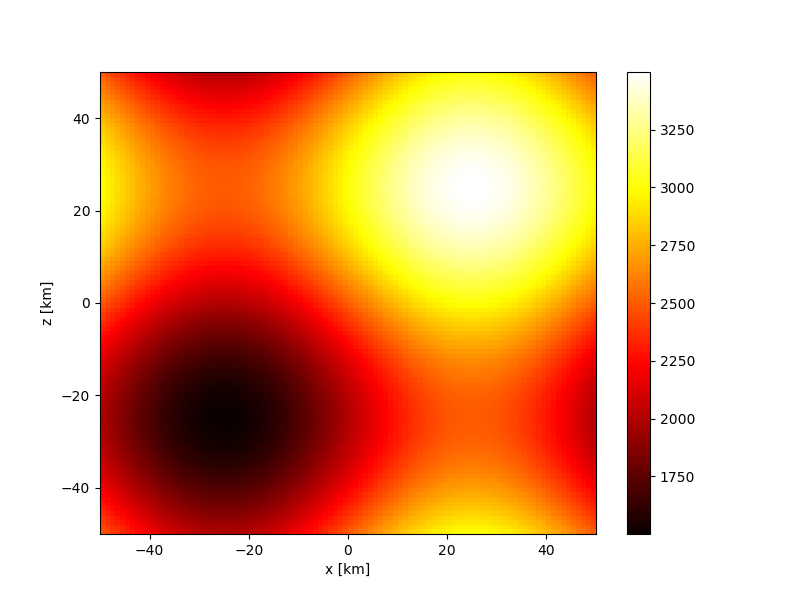

In [3]:
fig, ax1 = plt.subplots(figsize=(8, 6))

p = ax1.pcolormesh(C[0,:,0,:],C[2,:,0,:], ro[0,:,0,:], shading='flat', vmin=ro[0,:,0,:].min(), vmax=ro[0,:,0,:].max())#,edgecolors='k', linewidths=0.1)
ax1.set_xlabel('x [km]')
ax1.set_ylabel('z [km]')
cb = fig.colorbar(p, ax=ax1)
plt.show()

In [4]:
original_mc_sum = 0
for k in range(ncorezp-1):
    for j in range(ncoreyp-1):
        for i in range(ncorexp-1):
            original_mc_sum = original_mc_sum + mc[i,j,k]
print('ori mc',original_mc_sum)

ori mc 2500000000.0000086


In [5]:
def copyvertextocore(iold,jold,kold,i,j,k):
    Cp[:,i,j,k]=C[:,iold,jold,kold]
    Vp[:,i,j,k]=V[:,iold,jold,kold]
    
def copyvertexfromcore(iold,jold,kold,i,j,k):
    C[:,i,j,k]=Cp[:,iold,jold,kold]
    V[:,i,j,k]=Vp[:,iold,jold,kold]

def copycelltocore(iold,jold,kold,i,j,k):
    volp[i,j,k] = vol[iold,jold,kold]
    mcp[i,j,k] = mc[iold,jold,kold]
    siep[:,i,j,k] = sie[:,iold,jold,kold]
    cmcp[:,i,j,k] = cmc[:,iold,jold,kold]
    alphap[:,i,j,k] = alpha[:,iold,jold,kold]
    volstrainp[i,j,k] = volstrain[iold,jold,kold] 
    voidconcp[i,j,k] = voidconc[iold,jold,kold]
    initcoordp[:,i,j,k] = initcoord[:,iold,jold,kold]
    damagep[i,j,k] = damage[iold,jold,kold]
    rop[:,i,j,k] = ro[:,iold,jold,kold]
    
def copycellfromcore(iold,jold,kold,i,j,k):
    vol[i,j,k] = volp[iold,jold,kold]
    mc[i,j,k] = mcp[iold,jold,kold]
    sie[:,i,j,k] = siep[:,iold,jold,kold]
    cmc[:,i,j,k] = cmcp[:,iold,jold,kold]
    alpha[:,i,j,k] = alphap[:,iold,jold,kold]
    volstrain[i,j,k] = volstrainp[iold,jold,kold] 
    voidconc[i,j,k] = voidconcp[iold,jold,kold]
    initcoord[:,i,j,k] = initcoordp[:,iold,jold,kold]
    damage[i,j,k] = damagep[iold,jold,kold]
    ro[:,i,j,k] = rop[:,iold,jold,kold]

def coarsencell(i, j, k,inew,jnew,knew):
    totalmass = np.zeros(nmat)
    totalvol = np.zeros(nmat)
    volu = np.zeros(nmat)
    masse = np.zeros(nmat)
    alpha[:,inew,jnew,knew] = 0
    
    for kloc in range(k, k+2):
        for jloc in range(j, j+2):
            for iloc in range(i, i+2):
                mc[inew,jnew,knew] = mc[inew,jnew,knew]+mcp[iloc,jloc,kloc]
                for m in range(nmat):
                    volu[m] = volp[iloc,jloc,kloc]*cmcp[m,iloc,jloc,kloc]
                    totalvol[m] = totalvol[m] + volu[m]
                    masse[m] = rop[m,iloc,jloc,kloc]*volu[m]
                    totalmass[m] = totalmass[m] + masse[m]
                    sie[m,inew,jnew,knew] = sie[m,inew,jnew,knew] + masse[m]*siep[m,iloc,jloc,kloc]
                    alpha[m,inew,jnew,knew] = alpha[m,inew,jnew,knew] + volu[m]/alphap[m,iloc,jloc,kloc]
                    #print('alpha',alpha[m,inew,jnew,knew])
                    #add if statement here for dummy field
                    #add if statement here for hydro
                volstrain[inew,jnew,knew] = volstrain[inew,jnew,knew] + mcp[iloc,jloc,kloc]*volstrainp[iloc,jloc,kloc]
                
    for m in range(nmat):
        cmc[m,inew,jnew,knew] = totalvol[m]
        if(totalvol[m]>0):
            ro[m,inew,jnew,knew] = totalmass[m]/totalvol[m]
            alpha[m,inew,jnew,knew] = totalvol[m]/alpha[m,inew,jnew,knew]
            alpha[m,inew,jnew,knew] = min([max([1,alpha[m,inew,jnew,knew]]),alpha0[m]])
        else:
            ro[m,inew,jnew,knew] = 0
            alpha[m,inew,jnew,knew] = 1
        
        if(totalmass[m]>0):
            sie[m,inew,jnew,knew] = sie[m,inew,jnew,knew]/totalmass[m]
        else:
            sie[m,inew,jnew,knew] = 0
    
    if(mc[inew,jnew,knew]>0):
        volstrain[inew,jnew,knew] = volstrain[inew,jnew,knew]/mc[inew,jnew,knew]
        # add dummyf
        initcoord[:,inew,jnew,knew] = initcoord[:,inew,jnew,knew]/mc[inew,jnew,knew]
        damage[inew,jnew,knew] = damage[inew,jnew,knew]/mc[inew,jnew,knew]
        #add if statement here for hrdro
        
    else:
        volstrain[inew,jnew,knew] = 0
        initcoord[:,inew,jnew,knew] = 0
        damage[inew,jnew,knew] = 0
        #add if statement here for dymmy
        #add if for hrdro
    
def coarsenvelocity1(ilocs,iloce,jlocs,jloce,klocs,kloce,inew,jnew,knew):
    cellmomenta = np.zeros(3) 
    totalmass = 0
    for kloc in range(klocs,kloce+1):
        for jloc in range(jlocs,jloce+1):
            for iloc in range(ilocs,iloce+1):
                totalmass = totalmass + mcp[iloc,jloc,kloc]
                
                cellmomenta[:] = cellmomenta[:] + 0.125*mcp[iloc,jloc,kloc]*\
                (Vp[:,iloc,jloc,kloc] + Vp[:,iloc+1,jloc,kloc]+\
                Vp[:,iloc,jloc+1,kloc] + Vp[:,iloc,jloc,kloc+1] +\
                Vp[:,iloc+1,jloc+1,kloc] + Vp[:,iloc+1,jloc,kloc+1] +\
                Vp[:,iloc,jloc+1,kloc+1] + Vp[:,iloc+1,jloc+1,kloc+1])
    if(totalmass>0):
        V[:,inew,jnew,knew] = cellmomenta[:]/totalmass
    else:
        V[:,inew,jnew,knew] = 0

def coarsenvelocity2(iold,jold,kold,i,j,k):
    V1[:,i,j,k] = Vp[:,iold,jold,kold]

In [6]:

# coarsened by 2

dx = 2.* dx
dy = 2.* dy
dz = 2.* dz

#print('old',C[1,1,:,:] )
print('old size',C.shape)
# transfer variables from old mesh to core mesh
for k in range(ncorezp):
    kold = Ks_overlap + k 
    for j in range(ncoreyp):
        jold = Js_overlap + j 
        for i in range(ncorexp):
            iold = Is_overlap + i 
            # copyvertextocore
            copyvertextocore(iold,jold,kold,i,j,k)
            if((k!=ncorezp-1)and(j!=ncoreyp-1)and(i!=ncorexp-1)):
                # copycelltocore
                copycelltocore(iold,jold,kold,i,j,k)

print(np.allclose(Cp,C))
print(np.allclose(Vp,V))


old size (3, 101, 101, 101)
True
True


In [7]:

Is_overlap = int((Is_overlap)/2)
Ie_overlap = int(Is_overlap + ncorex/2)
Js_overlap = int((Is_overlap)/2)
Je_overlap = int(Js_overlap + ncorey/2)
Ks_overlap = int((Is_overlap)/2)
Ke_overlap = int(Ks_overlap + ncorez/2)



# number of cells in each direction of each zone
ncorexn = Ie_overlap - Is_overlap
ncoreyn = Je_overlap - Js_overlap
ncorezn = Ke_overlap - Ks_overlap

ncorexpn = ncorexn + 1
ncoreypn = ncoreyn + 1
ncorezpn = ncorezn + 1

C = np.zeros((3, ncorexpn, ncoreypn, ncorezpn))
V = np.zeros((3, ncorexpn, ncoreypn, ncorezpn))
V1 = np.zeros((3, ncorexpn, ncoreypn, ncorezpn))
vol = np.zeros((ncorexn, ncoreyn, ncorezn))
mc = np.zeros((ncorexn, ncoreyn, ncorezn))
cmc = np.zeros((nmat, ncorexn, ncoreyn, ncorezn))
initcoord = np.zeros((3, ncorexn, ncoreyn, ncorezn))
ro = np.zeros((nmat, ncorexn, ncoreyn, ncorezn))
sie = np.zeros((nmat, ncorexn, ncoreyn, ncorezn))
alpha = np.zeros((nmat, ncorexn, ncoreyn, ncorezn))
volstrain = np.zeros((ncorexn, ncoreyn, ncorezn))
voidconc = np.zeros((ncorexn, ncoreyn, ncorezn))
damage = np.zeros((ncorexn, ncoreyn, ncorezn))

kcore = 0
for k in range(Ks_overlap,Ke_overlap+1):
    jcore = 0
    for j in range(Js_overlap,Je_overlap+1):
        icore = 0
        for i in range(Is_overlap,Ie_overlap+1):
            copyvertexfromcore(icore,jcore,kcore,i,j,k)
            if((icore!=ncorexp-1) and (jcore!=ncoreyp-1) and (kcore!=ncorezp-1)):
                coarsencell(icore,jcore,kcore,i,j,k)
            coarsenvelocity1(max([0,icore-1]),min([icore,ncorex-1]),\
                max([0,jcore-1]),min([jcore,ncorey-1]),max([0,kcore-1]),\
                min([kcore,ncorez-1]),i,j,k)
            coarsenvelocity2(icore,jcore,kcore,i,j,k)
            icore = icore + 2
        jcore = jcore + 2
    kcore = kcore + 2

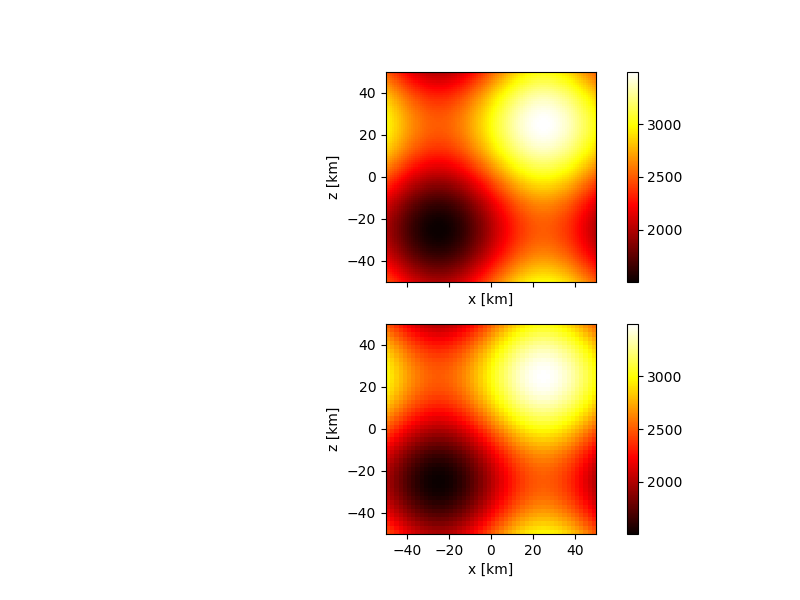

In [8]:
fig, (ax2,ax3) = plt.subplots(figsize=(8, 6),nrows=2,sharex=True)
ax2.set_aspect('equal')
ax3.set_aspect('equal')

p = ax2.pcolormesh(Cp[0,:,0,:],Cp[2,:,0,:], rop[0,:,0,:], shading='flat', vmin=rop[0,:,0,:].min(), vmax=rop[0,:,0,:].max())#,edgecolors='k', linewidths=0.1)
p1 = ax3.pcolormesh(C[0,:,0,:],C[2,:,0,:], ro[0,:,0,:], shading='flat', vmin=ro[0,:,0,:].min(), vmax=ro[0,:,0,:].max())#,edgecolors='k', linewidths=0.1)

ax2.set_xlabel('x [km]')
ax2.set_ylabel('z [km]')
ax3.set_xlabel('x [km]')
ax3.set_ylabel('z [km]')
cb = fig.colorbar(p, ax=ax2)
cb2 = fig.colorbar(p1, ax=ax3)
plt.show()

In [9]:
alpha0 = np.ones(3)
mat = np.ones(3)
dx = 1
dy = 1
dz = 1
nmat = 2

Is_overlap = 0
Ie_overlap = 100
Js_overlap = 0
Je_overlap = 100
Ks_overlap = 0
Ke_overlap = 100

# number of cells in each direction
ncorex = Ie_overlap - Is_overlap
ncorey = Je_overlap - Js_overlap
ncorez = Ke_overlap - Ks_overlap

# number of nodes in each direction
ncorexp = ncorex + 1
ncoreyp = ncorey + 1
ncorezp = ncorez + 1

# for nodes
Cp = np.zeros((3, ncorexp, ncoreyp, ncorezp))
Vp = np.zeros((3, ncorexp, ncoreyp, ncorezp))

C = np.zeros((3, ncorexp, ncoreyp, ncorezp))
V = np.random.randint(0, 100, size=(3, ncorexp, ncoreyp, ncorezp))

# for cells
volp = np.zeros((ncorex, ncorey, ncorez))
mcp = np.zeros((ncorex, ncorey, ncorez))
cmcp = np.zeros((nmat, ncorex, ncorey, ncorez))
initcoordp = np.zeros((3, ncorex, ncorey, ncorez))
rop = np.zeros((nmat, ncorex, ncorey, ncorez))
rop_ran = np.zeros((nmat, ncorex, ncorey, ncorez))
siep = np.zeros((nmat, ncorex, ncorey, ncorez))
alphap = np.zeros((nmat, ncorex, ncorey, ncorez))
volstrainp = np.zeros((ncorex, ncorey, ncorez))
voidconcp = np.zeros((ncorex, ncorey, ncorez))
damagep = np.zeros((ncorex, ncorey, ncorez))

x = np.linspace(-50,50,101)
y = np.linspace(-50,50,101)
z = np.linspace(-50,50,101)
Xc, Yc, Zc = np.meshgrid(0.5*(x[:-1]+x[1:]),0.5*(y[:-1]+y[1:]),0.5*(z[:-1]+z[1:]),indexing='ij')
v0=100.

ro= np.random.randint(0, 100, size=(nmat, ncorex, ncorey, ncorez))
    
Xn, Yn, Zn = np.meshgrid(x,y,z,indexing='ij')
vxp, vyp, vzp = -v0*Zn,  0*Yn, v0*Xn
# #ro = 2500 + 500*(np.sin(np.pi*X/50)+np.sin(np.pi*Z/50))
vol = np.ones((ncorex, ncorey, ncorez))
mc = np.zeros((100,100,100))
cmc = np.zeros((nmat, ncorex, ncorey, ncorez))
cmc[:,:,:,:] = 1/nmat
initcoord = np.random.randint(0, 100, size=(3, ncorex, ncorey, ncorez))
sie = np.random.randint(0, 100, size=(nmat, ncorex, ncorey, ncorez))
alpha = np.random.randint(0, 100, size=(nmat, ncorex, ncorey, ncorez))
volstrain = np.random.randint(0, 100, size=(ncorex, ncorey, ncorez))
voidconc = np.random.randint(0, 100, size=(ncorex, ncorey, ncorez))
damage = np.random.randint(0, 100, size=(ncorex, ncorey, ncorez))

for k in range(ncorezp):
    for j in range(ncoreyp):
        for i in range(ncorexp):
            C[:,i,j,k] = np.array([x[i],y[j],z[k]])
            
volu = np.zeros((nmat,ncorex,ncorey,ncorez))
mcu = np.zeros((nmat,ncorex,ncorey,ncorez))
for m in range(nmat):
    volu[m,:,:,:] = vol[:,:,:]*cmc[m,:,:,:]
    mcu[m,:,:,:] = volu[m,:,:,:]*ro[m,:,:,:]
    mc[:,:,:] = mc[:,:,:] + mcu[m,:,:,:]

In [10]:
# coarsened by 2

dx = 2.* dx
dy = 2.* dy
dz = 2.* dz

#print('old',C[1,1,:,:] )
print('old size',C.shape)
# transfer variables from old mesh to core mesh
for k in range(ncorezp):
    kold = Ks_overlap + k 
    for j in range(ncoreyp):
        jold = Js_overlap + j 
        for i in range(ncorexp):
            iold = Is_overlap + i 
            # copyvertextocore
            copyvertextocore(iold,jold,kold,i,j,k)
            if((k!=ncorezp-1)and(j!=ncoreyp-1)and(i!=ncorexp-1)):
                # copycelltocore
                copycelltocore(iold,jold,kold,i,j,k)

print(np.allclose(Cp,C))
print(np.allclose(Vp,V))

old size (3, 101, 101, 101)
True
True


In [11]:

Is_overlap = int((Is_overlap)/2)
Ie_overlap = int(Is_overlap + ncorex/2)
Js_overlap = int((Is_overlap)/2)
Je_overlap = int(Js_overlap + ncorey/2)
Ks_overlap = int((Is_overlap)/2)
Ke_overlap = int(Ks_overlap + ncorez/2)



# number of cells in each direction of each zone
ncorexn = Ie_overlap - Is_overlap
ncoreyn = Je_overlap - Js_overlap
ncorezn = Ke_overlap - Ks_overlap

ncorexpn = ncorexn + 1
ncoreypn = ncoreyn + 1
ncorezpn = ncorezn + 1

C = np.zeros((3, ncorexpn, ncoreypn, ncorezpn))
V = np.zeros((3, ncorexpn, ncoreypn, ncorezpn))
V1 = np.zeros((3, ncorexpn, ncoreypn, ncorezpn))
vol = np.zeros((ncorexn, ncoreyn, ncorezn))
mc = np.zeros((ncorexn, ncoreyn, ncorezn))
cmc = np.zeros((nmat, ncorexn, ncoreyn, ncorezn))
initcoord = np.zeros((3, ncorexn, ncoreyn, ncorezn))
ro = np.zeros((nmat, ncorexn, ncoreyn, ncorezn))
sie = np.zeros((nmat, ncorexn, ncoreyn, ncorezn))
alpha = np.zeros((nmat, ncorexn, ncoreyn, ncorezn))
volstrain = np.zeros((ncorexn, ncoreyn, ncorezn))
voidconc = np.zeros((ncorexn, ncoreyn, ncorezn))
damage = np.zeros((ncorexn, ncoreyn, ncorezn))

kcore = 0
for k in range(Ks_overlap,Ke_overlap+1):
    jcore = 0
    for j in range(Js_overlap,Je_overlap+1):
        icore = 0
        for i in range(Is_overlap,Ie_overlap+1):
            copyvertexfromcore(icore,jcore,kcore,i,j,k)
            if((icore!=ncorexp-1) and (jcore!=ncoreyp-1) and (kcore!=ncorezp-1)):
                coarsencell(icore,jcore,kcore,i,j,k)
            coarsenvelocity1(max([0,icore-1]),min([icore,ncorex-1]),\
                max([0,jcore-1]),min([jcore,ncorey-1]),max([0,kcore-1]),\
                min([kcore,ncorez-1]),i,j,k)
            coarsenvelocity2(icore,jcore,kcore,i,j,k)
            icore = icore + 2
        jcore = jcore + 2
    kcore = kcore + 2

In [12]:
copy_mc_sum = 0
for k in range(ncorez):
    for j in range(ncorey):
        for i in range(ncorex):
            copy_mc_sum = copy_mc_sum + mcp[i,j,k]
print('copy mc',copy_mc_sum)
new_mc_sum = 0
for k in range(ncorezn):
    for j in range(ncoreyn):
        for i in range(ncorexn):
            new_mc_sum = new_mc_sum + mc[i,j,k]
print('new mc',new_mc_sum)

copy mc 49539019.0
new mc 49539019.0


In [13]:
momentum = np.zeros(3)

for k in range(ncorez):
    for j in range(ncorey):
        for i in range(ncorex):
            momentum[:] = momentum[:] + 0.125*mcp[i,j,k]* (Vp[:,i,j,k]+Vp[:,i,j+1,k]+Vp[:,i+1,j,k]
                                                           +Vp[:,i,j,k+1]+Vp[:,i+1,j+1,k]+Vp[:,i+1,j,k+1]+Vp[:,i,j+1,k+1]+Vp[:,i+1,j+1,k+1])
print('method 1:without throwing velocity away')            
print('before coarsensing',momentum)
momentum_c = np.zeros(3)

for k in range(ncorezn):
    for j in range(ncoreyn):
        for i in range(ncorexn):
            momentum_c[:] = momentum_c[:] + 0.125*mc[i,j,k]* (V[:,i,j,k]+V[:,i,j+1,k]+V[:,i+1,j,k]
                                                           +V[:,i,j,k+1]+V[:,i+1,j+1,k]+V[:,i+1,j,k+1]+V[:,i,j+1,k+1]+V[:,i+1,j+1,k+1])

print('after coarsening',momentum_c)

method 1:without throwing velocity away
before coarsensing [2.45208850e+09 2.45406263e+09 2.45377117e+09]
after coarsening [2.45186060e+09 2.45409377e+09 2.45358604e+09]


In [14]:
momentum = np.zeros(3)

for k in range(ncorez):
    for j in range(ncorey):
        for i in range(ncorex):
            momentum[:] = momentum[:] + 0.125*mcp[i,j,k]* (Vp[:,i,j,k]+Vp[:,i,j+1,k]+Vp[:,i+1,j,k]
                                                           +Vp[:,i,j,k+1]+Vp[:,i+1,j+1,k]+Vp[:,i+1,j,k+1]+Vp[:,i,j+1,k+1]+Vp[:,i+1,j+1,k+1])
print('method 2:throwing velocity away')                    
print('before coarsensing',momentum)
momentum_c = np.zeros(3)

for k in range(ncorezn):
    for j in range(ncoreyn):
        for i in range(ncorexn):
            momentum_c[:] = momentum_c[:] + 0.125*mc[i,j,k]* (V1[:,i,j,k]+V1[:,i,j+1,k]+V1[:,i+1,j,k]
                                                           +V1[:,i,j,k+1]+V1[:,i+1,j+1,k]+V1[:,i+1,j,k+1]+V1[:,i,j+1,k+1]+V1[:,i+1,j+1,k+1])

print('after coarsening',momentum_c)

method 2:throwing velocity away
before coarsensing [2.45208850e+09 2.45406263e+09 2.45377117e+09]
after coarsening [2.45140939e+09 2.46136659e+09 2.45498867e+09]


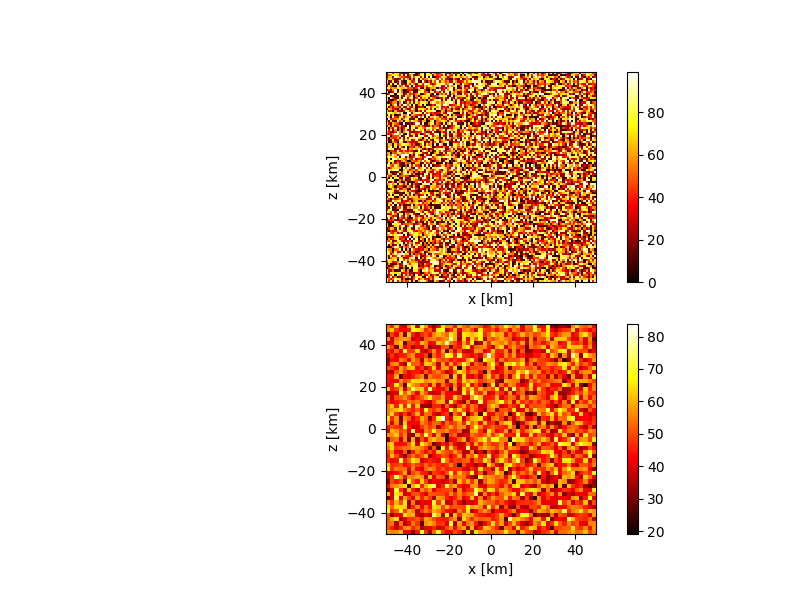

In [15]:
fig, (ax2,ax3) = plt.subplots(figsize=(8, 6),nrows=2,sharex=True)
ax2.set_aspect('equal')
ax3.set_aspect('equal')

p = ax2.pcolormesh(Cp[0,:,0,:],Cp[2,:,0,:], rop[0,:,0,:], shading='flat', vmin=rop[0,:,0,:].min(), vmax=rop[0,:,0,:].max())#,edgecolors='k', linewidths=0.1)
p1 = ax3.pcolormesh(C[0,:,0,:],C[2,:,0,:], ro[0,:,0,:], shading='flat', vmin=ro[0,:,0,:].min(), vmax=ro[0,:,0,:].max())#,edgecolors='k', linewidths=0.1)

ax2.set_xlabel('x [km]')
ax2.set_ylabel('z [km]')
ax3.set_xlabel('x [km]')
ax3.set_ylabel('z [km]')
cb = fig.colorbar(p, ax=ax2)
cb2 = fig.colorbar(p1, ax=ax3)
plt.show()